# 6.4 Economic Freedom Data: Supervised Machine Learning

## This Script Contains the Following points

### 1. Importing Libraries
### 2. Importing  and Checking Data sets
### 3. Wrangle data to correct format
### 4. Regression Analysis: Only Recent Data
### 5. Regression Analysis: Bigger Dataset
### 6. Notes and Analysis


### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

### 2. Importing and Checking Data sets

In [3]:
#Define path
path = r'/Users/mistystone/Library/CloudStorage/OneDrive-Personal/Documents/CF_Data_Ach6_Dashboard/Economic_Freedom_Analysis/'

Note that for the Geographic and Exploring Relationships, I used only the most recent year (or the year with the least missing data for the education variables) for the analysis. Having only one observation per country rarely includes enough data for a rigorous regression analysis, much to many economists' chagrin. I am going to begin the analysis with only the recent year -- mostly so that I can learn how to run regressions in Python. Then I will assess whether we need to extend the dataset to multiple years. 

The hypothesis that we are going to test is that the higher Secondary Female Enrollment, the higher Economic Freedom Index.

In [4]:
#Import Data
df_Recent = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Subset_Recent_Year_Data.pkl'))

In [5]:
#Check Data
df_Recent.head()

,Country,Economic Freedom Summary Index,Rank,Quartile,GDP_PerCapita,GDP_2010Prices_Millions,Pop_mill,Pop_male_mill,Pop_female_mill,Pop_0_14_per,...,Enroll_Ratio_Primary_Male,Enroll_Ratio_Secondary_Female,Enroll_Ratio_Secondary_Male,Enroll_Ratio_UpperSecondary_Female,Enroll_Ratio_UpperSecondary_Male,Continent,Income group,Landlocked?,LDC?,English?
0,Albania,7.60,31.0,1.0,5181.0,12541.0,2.84,1.42,1.42,16.1,...,100.4,76.5,79.2,56.8,62.1,Europe,Upper middle income,0,0,0
1,Algeria,4.82,157.0,4.0,3368.0,168331.0,44.90,22.86,22.04,30.6,...,111.7,82.7,75.5,62.4,42.3,Africa,Lower middle income,0,0,0
2,Angola,5.38,149.0,4.0,1896.0,105625.0,35.59,17.59,18.00,45.0,...,NaN,NaN,NaN,NaN,NaN,Africa,Lower middle income,0,1,0
3,Argentina,4.77,158.0,4.0,8476.0,558065.0,45.51,22.53,22.98,23.1,...,115.8,96.8,88.8,75.6,65.2,South America,Upper middle income,0,0,1
4,Armenia,7.58,33.0,1.0,4266.0,11919.0,2.78,1.25,1.53,20.5,...,94.6,NaN,NaN,NaN,NaN,Asia,Upper middle income,1,0,0


In [6]:
# Check Data
df_Recent.shape

(165, 29)

In [7]:
#Only relevant variables: Economic Freedom Index and Secondary Female Enrollment.
df_Reg1 = df_Recent[['Economic Freedom Summary Index','Enroll_Ratio_Secondary_Female']]

In [8]:
#check head
df_Reg1.head(5)

,Economic Freedom Summary Index,Enroll_Ratio_Secondary_Female
0,7.60,76.5
1,4.82,82.7
2,5.38,NaN
3,4.77,96.8
4,7.58,NaN


In [9]:
# check shape
df_Reg1.shape

(165, 2)

### 3. Wrangle Data to the correct format

In [10]:
# Check for missing values

df_Reg1.isnull().sum()

# Note that there are 40 missing values. This leaves only 125 observations.
# This is not going to be a statistically significant regression,
# but we are going to move forward out of curiousity. 

Economic Freedom Summary Index     0
Enroll_Ratio_Secondary_Female     40
dtype: int64

In [11]:
# Drop Missing Values
df_Reg1.dropna(inplace = True)

/var/folders/cc/my2vy3vj0tvb16y7yszvbr280000gn/T/ipykernel_57355/984248748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Reg1.dropna(inplace = True)


In [12]:
df_Reg1.shape

(125, 2)

/var/folders/cc/my2vy3vj0tvb16y7yszvbr280000gn/T/ipykernel_57355/109412562.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_Reg1['Economic Freedom Summary Index'], bins=25) # Shows extreme values


<Axes: xlabel='Economic Freedom Summary Index', ylabel='Density'>

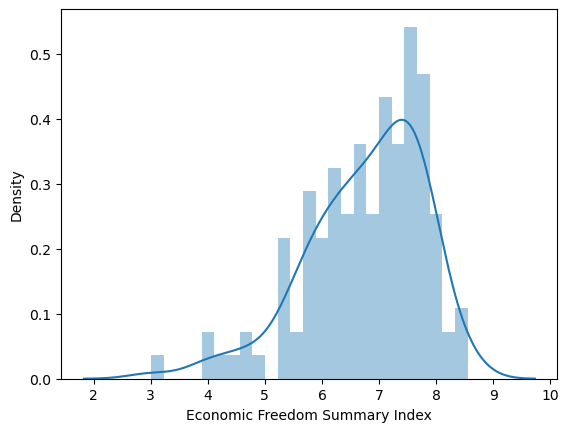

In [13]:
sns.distplot(df_Reg1['Economic Freedom Summary Index'], bins=25) # Shows extreme values

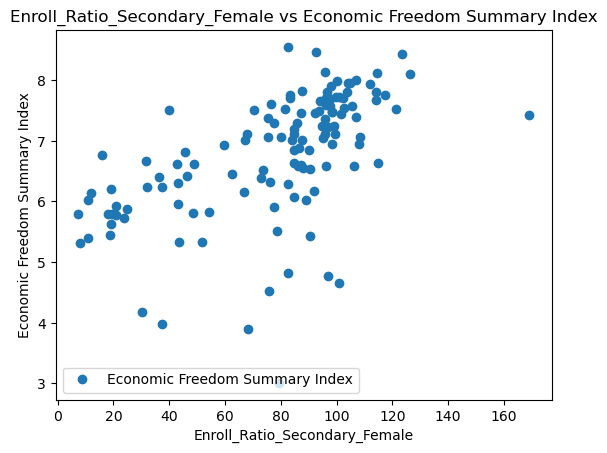

In [14]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_Reg1.plot(x = 'Enroll_Ratio_Secondary_Female', y='Economic Freedom Summary Index',style='o') 
# The style option creates a scatterplot; without it, we only have lines.
plt.title('Enroll_Ratio_Secondary_Female vs Economic Freedom Summary Index')  
plt.xlabel('Enroll_Ratio_Secondary_Female')  
plt.ylabel('Economic Freedom Summary Index')  
plt.show()

In [15]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_Reg1['Enroll_Ratio_Secondary_Female'].values.reshape(-1,1)
y = df_Reg1['Economic Freedom Summary Index'].values.reshape(-1,1)

In [16]:
X

array([[ 76.5],
       [ 82.7],
       [ 96.8],
       [ 97.8],
       [ 88.1],
       [101.5],
       [ 48.5],
       [108. ],
       [169.1],
       [ 77.7],
       [ 42.7],
       [ 84.9],
       [ 84.8],
       [106.2],
       [ 95.8],
       [ 87.3],
       [ 11.8],
       [ 11. ],
       [ 75.3],
       [ 23.8],
       [100.2],
       [  8. ],
       [ 94.1],
       [ 87.2],
       [ 83.4],
       [ 94.8],
       [ 97.5],
       [ 96.6],
       [126.5],
       [ 18.2],
       [ 77.5],
       [ 62.5],
       [ 67.8],
       [104.7],
       [ 51.8],
       [ 18.8],
       [114.3],
       [107. ],
       [ 96.3],
       [100.9],
       [ 36.4],
       [ 98.4],
       [ 39.8],
       [ 19.1],
       [ 90.3],
       [ 82.7],
       [ 95.8],
       [112.1],
       [ 49. ],
       [ 59.8],
       [ 75.8],
       [114.6],
       [105.6],
       [ 98.9],
       [ 92.4],
       [ 85.7],
       [ 45.7],
       [ 98.2],
       [ 98.2],
       [114.7],
       [ 86.7],
       [ 37.4],
       [

In [17]:
y

array([[7.6 ],
       [4.82],
       [4.77],
       [7.69],
       [6.55],
       [7.44],
       [5.81],
       [6.94],
       [7.43],
       [5.91],
       [6.62],
       [6.08],
       [6.84],
       [6.58],
       [7.12],
       [7.46],
       [6.14],
       [5.4 ],
       [7.38],
       [5.72],
       [7.98],
       [5.31],
       [7.66],
       [6.6 ],
       [7.76],
       [7.25],
       [7.57],
       [7.81],
       [8.1 ],
       [5.79],
       [7.3 ],
       [6.46],
       [7.11],
       [7.95],
       [5.33],
       [5.44],
       [7.81],
       [7.4 ],
       [7.71],
       [7.73],
       [6.41],
       [6.94],
       [7.5 ],
       [5.62],
       [5.43],
       [8.55],
       [7.36],
       [7.93],
       [6.62],
       [6.93],
       [4.53],
       [8.11],
       [7.57],
       [7.25],
       [7.46],
       [7.3 ],
       [6.82],
       [7.47],
       [7.47],
       [6.63],
       [6.88],
       [6.24],
       [7.71],
       [5.95],
       [4.65],
       [7.95],
       [7.

In [18]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression Analysis: Only Recent Data

In [19]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.v

In [20]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

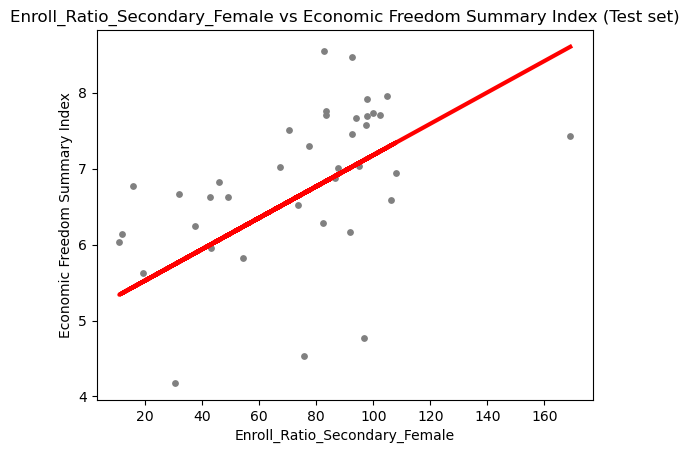

In [22]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Enroll_Ratio_Secondary_Female vs Economic Freedom Summary Index (Test set)')
plot_test.xlabel('Enroll_Ratio_Secondary_Female')
plot_test.ylabel('Economic Freedom Summary Index')
plot_test.show()

In [23]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [24]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.02063388]]
Mean squared error:  0.8333836608749896
R2 score:  0.14666242271250451


In [25]:
y_predicted

array([[8.60385   ],
       [6.67870882],
       [5.50876772],
       [6.83552632],
       [6.0019175 ],
       [6.81695583],
       [7.02123126],
       [6.56522247],
       [7.34311982],
       [7.02329465],
       [5.99572733],
       [7.17598537],
       [6.83346293],
       [6.12572079],
       [5.76875463],
       [7.11202034],
       [5.43861252],
       [6.63125089],
       [7.05630886],
       [6.8210826 ],
       [6.05762898],
       [6.50125744],
       [6.92425201],
       [5.88636776],
       [5.35814038],
       [6.71378642],
       [6.23301697],
       [7.30597883],
       [7.27502801],
       [7.07487935],
       [7.12646406],
       [7.00885093],
       [7.22757008],
       [6.90361813],
       [5.7398672 ],
       [5.33956989],
       [7.13265422],
       [7.13471761]])

In [26]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,7.43,8.603850
1,4.53,6.678709
2,5.62,5.508768
3,7.76,6.835526
4,5.95,6.001917
5,6.28,6.816956
6,7.46,7.021231
7,7.51,6.565222
8,6.94,7.343120
9,8.47,7.023295


In [27]:
##### Compare how the regression fits the training set

In [28]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [29]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [30]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.02063388]]
Mean squared error:  0.6858770075989951
R2 score:  0.36884548169705333


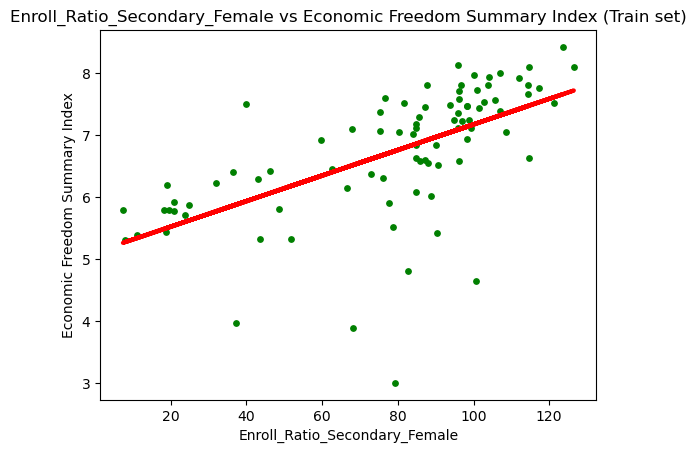

In [31]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Enroll_Ratio_Secondary_Female vs Economic Freedom Summary Index (Train set)')
plot_test.xlabel('Enroll_Ratio_Secondary_Female')
plot_test.ylabel('Economic Freedom Summary Index')
plot_test.show()

Analysis:

### 5. Regression Analysis: Bigger Dataset

In [32]:
#Import Data
df_EconFreeData = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'EconFreeData.pkl'))

In [33]:
#check 
df_EconFreeData.head(5)

,Year,Country,Economic Freedom Summary Index,Rank,Quartile
0,2021,Albania,7.60,31.0,1.0
1,2021,Algeria,4.82,157.0,4.0
2,2021,Angola,5.38,149.0,4.0
3,2021,Argentina,4.77,158.0,4.0
4,2021,Armenia,7.58,33.0,1.0


In [34]:
#Import Data
df_Education = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Education.pkl'))

In [35]:
#check
df_Education.head(5)

,Country,Year,Enroll_Ratio_Primary_Female,Enroll_Ratio_Primary_Male,Enroll_Ratio_Secondary_Female,Enroll_Ratio_Secondary_Male,Enroll_Ratio_UpperSecondary_Female,Enroll_Ratio_UpperSecondary_Male
0,Antigua and Barbuda,2000,NaN,NaN,76.6,83.0,77.8,78.0
1,Armenia,2000,99.3,98.0,96.5,87.8,89.9,79.8
2,Guinea-Bissau,2000,60.6,90.9,12.7,23.6,7.5,14.3
3,Kazakhstan,2000,97.1,96.8,96.2,91.3,102.0,94.8
4,Liberia,2000,98.5,133.7,30.3,41.4,29.5,34.4


In [36]:
# merge
df_Reg2 = df_EconFreeData.merge(df_Education, on = ['Country', 'Year'], how = 'left')

In [37]:
df_Reg2.head(5)

,Year,Country,Economic Freedom Summary Index,Rank,Quartile,Enroll_Ratio_Primary_Female,Enroll_Ratio_Primary_Male,Enroll_Ratio_Secondary_Female,Enroll_Ratio_Secondary_Male,Enroll_Ratio_UpperSecondary_Female,Enroll_Ratio_UpperSecondary_Male
0,2021,Albania,7.60,31.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,Algeria,4.82,157.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,Angola,5.38,149.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,Argentina,4.77,158.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,Armenia,7.58,33.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#check 
df_Reg2.shape

(4620, 11)

In [39]:
# Limit dataset to interesting variables
df_Reg2 = df_Reg2[['Economic Freedom Summary Index','Enroll_Ratio_UpperSecondary_Female']]

In [40]:
#check
df_Reg2.shape

(4620, 2)

In [41]:
#check
df_Reg2.head(5)

,Economic Freedom Summary Index,Enroll_Ratio_UpperSecondary_Female
0,7.60,NaN
1,4.82,NaN
2,5.38,NaN
3,4.77,NaN
4,7.58,NaN


In [42]:
# Check for missing values

df_Reg2.isnull().sum()


Economic Freedom Summary Index         679
Enroll_Ratio_UpperSecondary_Female    4052
dtype: int64

In [43]:
# Drop Missing Values
df_Reg2.dropna(inplace = True)

In [44]:
#check
df_Reg2.shape

(532, 2)

/var/folders/cc/my2vy3vj0tvb16y7yszvbr280000gn/T/ipykernel_57355/2101958427.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_Reg2['Economic Freedom Summary Index'], bins=25) # Shows extreme values


<Axes: xlabel='Economic Freedom Summary Index', ylabel='Density'>

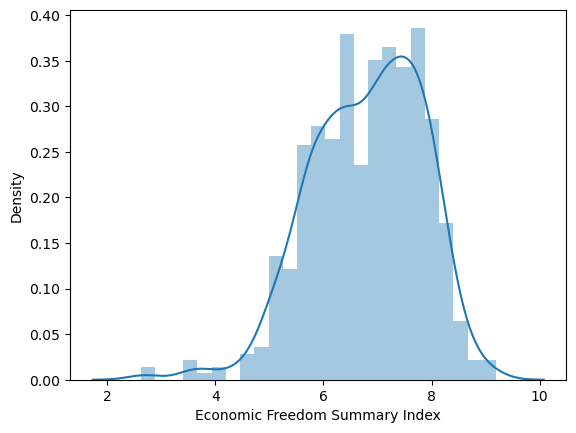

In [45]:
sns.distplot(df_Reg2['Economic Freedom Summary Index'], bins=25) # Shows extreme values

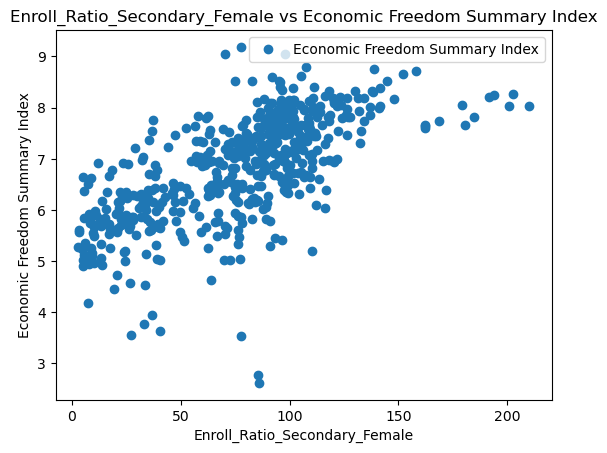

In [46]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_Reg2.plot(x = 'Enroll_Ratio_UpperSecondary_Female', y='Economic Freedom Summary Index',style='o') 
# The style option creates a scatterplot; without it, we only have lines.
plt.title('Enroll_Ratio_Secondary_Female vs Economic Freedom Summary Index')  
plt.xlabel('Enroll_Ratio_Secondary_Female')  
plt.ylabel('Economic Freedom Summary Index')  
plt.show()

In [47]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_Reg2['Enroll_Ratio_UpperSecondary_Female'].values.reshape(-1,1)
y = df_Reg2['Economic Freedom Summary Index'].values.reshape(-1,1)

In [48]:
X

array([[ 51.6],
       [ 41.8],
       [ 84.8],
       [ 90.8],
       [ 85.7],
       [ 74.8],
       [ 66.9],
       [115.3],
       [ 67.3],
       [ 24.9],
       [ 86.9],
       [ 87.8],
       [ 21.1],
       [ 38.2],
       [ 39. ],
       [ 82.3],
       [162.2],
       [ 30.9],
       [ 73.5],
       [ 97.5],
       [105.3],
       [ 66.2],
       [ 36.6],
       [ 61.3],
       [105.4],
       [ 66.5],
       [ 77.2],
       [ 60.2],
       [112.4],
       [ 85.3],
       [ 46.6],
       [120.1],
       [ 89.9],
       [ 63.8],
       [ 75. ],
       [ 96.5],
       [ 72.3],
       [ 79.6],
       [109.2],
       [109.6],
       [ 37.3],
       [ 89. ],
       [ 63.4],
       [  5.5],
       [110.5],
       [ 34.8],
       [107.9],
       [ 93.3],
       [191.7],
       [ 96.2],
       [101.9],
       [162.2],
       [ 85.4],
       [101.4],
       [114.8],
       [ 79.9],
       [120.3],
       [ 10.2],
       [105. ],
       [ 87.6],
       [ 93.9],
       [ 96.4],
       [

In [49]:
y

array([[5.4 ],
       [5.79],
       [7.82],
       [7.59],
       [7.62],
       [5.94],
       [5.79],
       [6.96],
       [5.94],
       [6.35],
       [6.67],
       [7.25],
       [6.15],
       [6.88],
       [5.7 ],
       [6.17],
       [7.61],
       [6.04],
       [7.32],
       [6.39],
       [7.66],
       [6.43],
       [7.55],
       [6.97],
       [8.62],
       [6.64],
       [7.36],
       [7.32],
       [7.18],
       [6.92],
       [6.3 ],
       [6.96],
       [7.48],
       [6.48],
       [6.34],
       [6.55],
       [7.53],
       [7.02],
       [7.58],
       [6.65],
       [6.15],
       [6.78],
       [7.16],
       [6.37],
       [6.95],
       [6.23],
       [7.35],
       [5.45],
       [8.2 ],
       [7.89],
       [7.32],
       [7.67],
       [6.17],
       [6.73],
       [7.67],
       [7.51],
       [8.09],
       [5.49],
       [8.05],
       [6.77],
       [7.3 ],
       [7.86],
       [7.98],
       [8.32],
       [5.48],
       [7.34],
       [8.

In [50]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [51]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.v

In [52]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [53]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

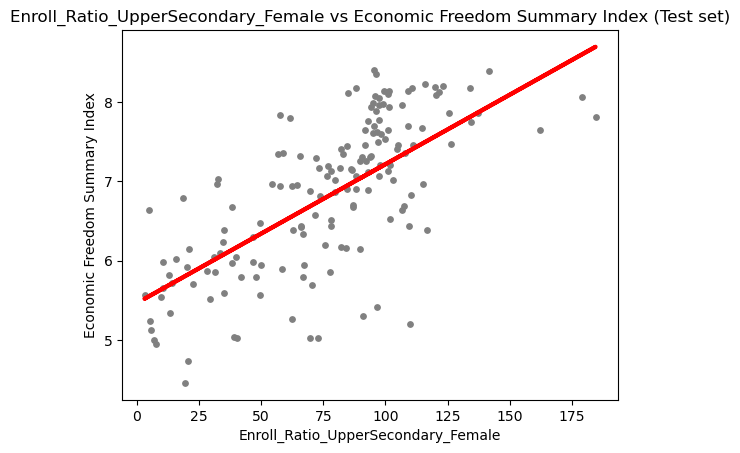

In [54]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Enroll_Ratio_UpperSecondary_Female vs Economic Freedom Summary Index (Test set)')
plot_test.xlabel('Enroll_Ratio_UpperSecondary_Female')
plot_test.ylabel('Economic Freedom Summary Index')
plot_test.show()

In [55]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [56]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01748624]]
Mean squared error:  0.45150909258601735
R2 score:  0.5006702342324103


In [57]:
y_predicted

array([[7.04604589],
       [7.068778  ],
       [6.04933021],
       [7.40101656],
       [6.9376312 ],
       [5.63665495],
       [5.69960542],
       [6.73828806],
       [7.39227344],
       [6.94812294],
       [6.6823321 ],
       [7.32757435],
       [6.13326416],
       [5.58594486],
       [6.07381095],
       [7.35205508],
       [6.90440734],
       [7.81369182],
       [7.07227525],
       [6.3326073 ],
       [6.00561461],
       [5.56321274],
       [5.98113388],
       [6.98659267],
       [6.63511925],
       [7.16670094],
       [6.96910643],
       [6.83271376],
       [7.66505878],
       [7.81019457],
       [6.86069174],
       [6.08080544],
       [6.75052843],
       [6.33085868],
       [7.07752112],
       [7.505934  ],
       [6.48998346],
       [8.69324968],
       [7.16670094],
       [6.61413576],
       [7.37828444],
       [7.00932478],
       [7.39052481],
       [7.30309361],
       [6.8571945 ],
       [6.78724954],
       [7.93959275],
       [5.806

In [58]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,7.30,7.046046
1,7.45,7.068778
2,6.10,6.049330
3,8.18,7.401017
4,6.16,6.937631
5,5.54,5.636655
6,5.34,5.699605
7,5.02,6.738288
8,6.82,7.392273
9,8.11,6.948123


In [59]:
##### Compare how the regression fits the training set

In [60]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [61]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [62]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01748624]]
Mean squared error:  0.650870962177043
R2 score:  0.42733811502783614


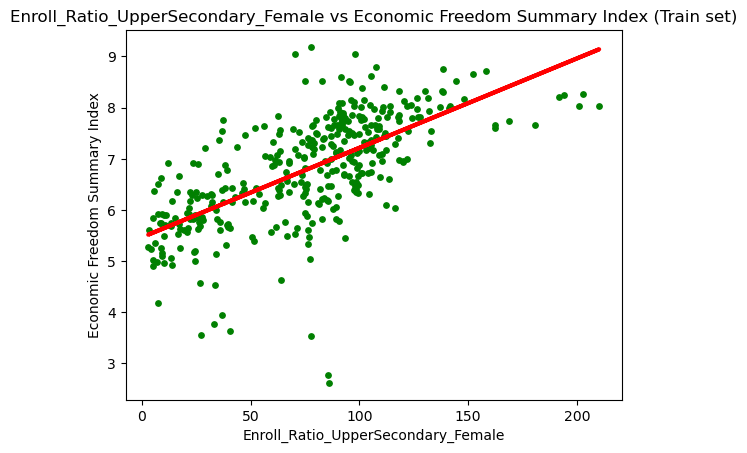

In [63]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Enroll_Ratio_UpperSecondary_Female vs Economic Freedom Summary Index (Train set)')
plot_test.xlabel('Enroll_Ratio_UpperSecondary_Female')
plot_test.ylabel('Economic Freedom Summary Index')
plot_test.show()

### 6. Notes and Analysis

There is clearly a positive relationship between the Economic Freedom Index and the proportion of the female population enrolled in secondary. Nonetheless, considering the scatterplots, we are not surprised that there is still a lot of variation in the dataset. Our MSE is 0.6508, which is quite significant. Our R2 score is 0.4273, which indicates that the model is not a particularly great fit. The R2 score of the regression with only the very small data set is 0.38, which is (not surprisingly) a better fit. 

This analysis leaves me with a desire to perform a multivariable regression! We need to consider many more factors in order to fully understand Economic Freedom. 

The actual vs predicted values of the y variables are actually quite close. 

In terms of bias, the larger dataset is probably too focused on the countries with larger GDP per capita as these tend to be the countries without missing data. 